In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [98]:
# Step 1: Data Collection and Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [99]:

# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [100]:
# Drop irrelevant features
df = df.drop(['customerID', 'TotalCharges'], axis=1)

# Convert categorical features to numerical features
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
df[cat_cols] = df[cat_cols].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0, 'No internet service': 0,
                                     'No phone service': 0, 'DSL': 1, 'Fiber optic': 2, 'Month-to-month': 0,
                                     'One year': 1, 'Two year': 2, 'Electronic check': 0, 'Mailed check': 1,
                                     'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})


In [101]:
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [102]:
# Step 2: Feature Selection
X = df_scaled.drop(['Churn'], axis=1)

In [6]:
# Step 3: Cluster Analysis
from sklearn.cluster import KMeans


In [7]:
# Define the number of clusters
n_clusters = 3

In [8]:
# Fit the K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# Fit the K-Means clustering algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

In [10]:
# Add the cluster labels to the dataframe
df_scaled['cluster'] = labels

In [11]:

# Step 4: Cluster Validation
from sklearn.metrics import silhouette_score

In [12]:

# Evaluate the quality of the clusters
silhouette_score(X, labels)

0.14943065554784501

In [14]:
# Step 5: Interpretation and Prediction
# Analyze the characteristics of the clusters and identify the clusters that have a high proportion of churned customers.
# Use these insights to predict customer churn and take appropriate actions to reduce churn rates.

# Calculate the proportion of churned customers in each cluster
df_scaled.groupby(['cluster'])['Churn'].mean()



cluster
0   -0.344398
1    0.519904
2   -0.289239
Name: Churn, dtype: float64

In [15]:
# Analyze the characteristics of the clusters
df_scaled.groupby(['cluster']).mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
cluster,,,,,,,,,,,,,,,,,,,
0,-0.008549,-0.061865,0.486481,0.242780,0.947352,-0.032880,0.427737,0.374965,0.784169,0.761504,0.839233,0.852098,0.690717,0.695119,0.773796,0.090008,0.453433,0.745205,-0.344398
1,-0.006129,0.334519,-0.323905,-0.377335,-0.536714,0.143042,0.103061,0.686308,-0.269665,-0.103679,-0.121451,-0.289759,0.110561,0.107719,-0.737084,0.415009,-0.505206,0.456077,0.519904
2,0.014730,-0.329514,-0.063938,0.216367,-0.232765,-0.135132,-0.502668,-1.126654,-0.393648,-0.564362,-0.613693,-0.431507,-0.747415,-0.748096,0.153703,-0.558523,0.174426,-1.194054,-0.289239


In [17]:
# Identify the clusters that have a high proportion of churned customers
high_churn_clusters = df_scaled.groupby(['cluster'])['Churn'].mean().sort_values(ascending=False).head()
# Print the high churn clusters
print("Clusters with high proportion of churned customers:")
print(high_churn_clusters)

Clusters with high proportion of churned customers:
cluster
1    0.519904
2   -0.289239
0   -0.344398
Name: Churn, dtype: float64


In [18]:
# Use these insights to predict customer churn
cluster_labels = df_scaled.groupby(['cluster'])['Churn'].mean().sort_values(ascending=False).index
df['cluster'] = df_scaled['cluster'].replace(dict(zip(range(n_clusters), cluster_labels)))
df.groupby(['cluster'])['Churn'].mean()

cluster
0    0.137662
1    0.113308
2    0.494923
Name: Churn, dtype: float64

In [32]:
#Step 6: Visualize the clusters
import matplotlib.pyplot as plt
import seaborn as sns

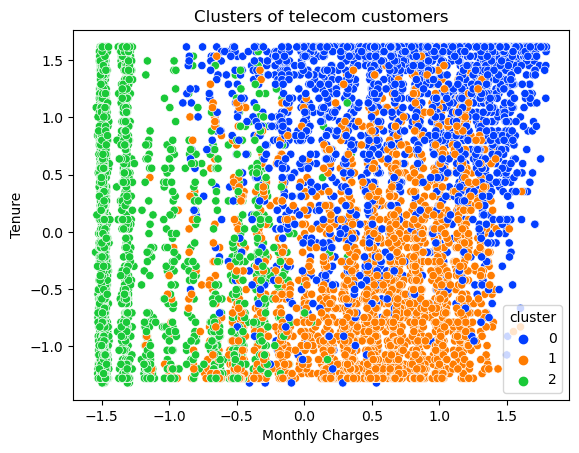

In [33]:
#Create a scatter plot of the clusters
sns.scatterplot(x='MonthlyCharges', y='tenure', hue='cluster', data=df_scaled, palette='bright')
plt.title('Clusters of telecom customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()

In [67]:
# Step 4: Cluster Validation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluate the quality of the clusters
silhouette_score_kmeans = silhouette_score(X, labels)
calinski_harabasz_score_kmeans = calinski_harabasz_score(X, labels)
davies_bouldin_score_kmeans = davies_bouldin_score(X, labels)

print("Silhouette Score for K-Means Clustering: ", silhouette_score_kmeans)
print("Calinski-Harabasz Index for K-Means Clustering: ", calinski_harabasz_score_kmeans)
print("Davies-Bouldin Index for K-Means Clustering: ", davies_bouldin_score_kmeans)


Silhouette Score for K-Means Clustering:  0.14943065554784501
Calinski-Harabasz Index for K-Means Clustering:  1255.8040901062045
Davies-Bouldin Index for K-Means Clustering:  2.130301101609589


In [66]:
#Cluster Analysis using Hierarchical Fuzzy C-Means
from skfuzzy.cluster import hierarchy
from skfuzzy.cluster import fcm

ImportError: cannot import name 'hierarchy' from 'skfuzzy.cluster' (/opt/conda/lib/python3.7/site-packages/skfuzzy/cluster/__init__.py)

In [54]:
n_clusters = 3
fcm = FCM(n_clusters=3)
fcm.fit(X)


ValidationError: 1 validation error for Fit
X
          gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0    -1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1     0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2     0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3     0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4    -1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
...        ...            ...       ...         ...       ...           ...   
7038  0.990532      -0.439916  1.034530    1.529024 -0.340876      0.327438   
7039 -1.009559      -0.439916  1.034530    1.529024  1.613701      0.327438   
7040 -1.009559      -0.439916  1.034530    1.529024 -0.870241     -3.054010   
7041  0.990532       2.273159  1.034530   -0.654012 -1.155283      0.327438   
7042  0.990532      -0.439916 -0.966622   -0.654012  1.369379      0.327438   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0         -0.854176        -0.286223       -0.633933      1.378241   
1         -0.854176        -0.286223        1.577454     -0.725563   
2         -0.854176        -0.286223        1.577454      1.378241   
3         -0.854176        -0.286223        1.577454     -0.725563   
4         -0.854176         0.997769       -0.633933     -0.725563   
...             ...              ...             ...           ...   
7038       1.170719        -0.286223        1.577454     -0.725563   
7039       1.170719         0.997769       -0.633933      1.378241   
7040      -0.854176        -0.286223        1.577454     -0.725563   
7041       1.170719         0.997769       -0.633933     -0.725563   
7042      -0.854176         0.997769        1.577454     -0.725563   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
1             1.381277    -0.639439    -0.790132        -0.796070  0.371271   
2            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
3             1.381277     1.563872    -0.790132        -0.796070  0.371271   
4            -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
...                ...          ...          ...              ...       ...   
7038          1.381277     1.563872     1.265612         1.256171  0.371271   
7039          1.381277    -0.639439     1.265612         1.256171  0.371271   
7040         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
7041         -0.723968    -0.639439    -0.790132        -0.796070 -0.828207   
7042          1.381277     1.563872     1.265612         1.256171  1.570749   

      PaperlessBilling  PaymentMethod  MonthlyCharges  
0             0.829798      -1.145198       -1.160323  
1            -1.205113      -0.274744       -0.259629  
2             0.829798      -0.274744       -0.362660  
3            -1.205113       0.595711       -0.746535  
4             0.829798      -1.145198        0.197365  
...                ...            ...             ...  
7038          0.829798      -0.274744        0.665992  
7039          0.829798       1.466165        1.277533  
7040          0.829798      -1.145198       -1.168632  
7041          0.829798      -0.274744        0.320338  
7042          0.829798       0.595711        1.358961  

[7043 rows x 18 columns] is not an instance of numpy.ndarray (type=value_error)

# Heirarchical Fuzzy c means clustering

In [64]:
from scipy.cluster.hierarchy import fclusterdata
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [60]:


# Define the number of clusters
n_clusters = 3

# Compute the distances between the data points
distances = np.zeros((X.shape[0], X.shape[0]))
for i in range(X.shape[0]):
    for j in range(i+1, X.shape[0]):
        distances[i, j] = np.sqrt(np.sum((X.iloc[i] - X.iloc[j])**2))
        distances[j, i] = distances[i, j]


KeyboardInterrupt: 

In [61]:

# Compute the linkage matrix using the average method
Z = linkage(distances, method='average')

# Perform hierarchical Fuzzy C-means clustering
cluster_centers, u, u0, d, jm, p, fpc = hierarchy.hierarchy_fcm(data=X.T, c=n_clusters, m=2, method='average', metric='euclidean',
                                           seed=42, distance=distances, linkage=Z)

# Get the cluster labels
labels = np.argmax(u, axis=0)

# Add the cluster labels to the dataframe
df_scaled['cluster'] = labels

# Step 4: Cluster Validation
from sklearn.metrics import silhouette_score

# Evaluate the quality of the clusters
silhouette_score(X, labels)

# Step 5: Interpretation and Prediction
# Analyze the characteristics of the clusters and identify the clusters that have a high proportion of churned customers.
# Use these insights to predict customer churn and take appropriate actions to reduce churn rates.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


AttributeError: module 'scipy.cluster.hierarchy' has no attribute 'hierarchy_fcm'

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from fcmeans import FCM
%matplotlib inline

# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preprocessing the data
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Function to plot the clusters
def plot_clusters(X, y, title):
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='bright')
    plt.title(title)
    plt.show()

# K-means
kmeans = KMeans(n_clusters=2, random_state=0)
clusters_kmeans = kmeans.fit_predict(X_std)
plot_clusters(X_pca, clusters_kmeans, 'K-means')

# Mini-batch K-means
mini_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0)
clusters_mini_kmeans = mini_kmeans.fit_predict(X_std)
plot_clusters(X_pca, clusters_mini_kmeans, 'Mini-batch K-means')

# GMM
gmm = GaussianMixture(n_components=2, random_state=0)
clusters_gmm = gmm.fit_predict(X_std)
plot_clusters(X_pca, clusters_gmm, 'GMM')

# DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X_std)
plot_clusters(X_pca, clusters_dbscan, 'DBSCAN')

# Fuzzy c-means
fcm = FCM(n_clusters=2)
fcm.fit(X_std)
clusters_fcm = fcm.predict(X_std)
plot_clusters(X_pca, clusters_fcm, 'Fuzzy c-means')

# Spectral clustering
spectral = SpectralClustering(n_clusters=2, random_state=0, affinity='nearest_neighbors')
clusters_spectral = spectral.fit_predict(X_std)
plot_clusters(X_pca, clusters_spectral, 'Spectral Clustering')

# Evaluation Metrics
print('K-means')
print('Silhouette Score:', silhouette_score(X_std, clusters_kmeans))
print('Calinski-Harabasz:', calinski_harabasz_score(X_std, clusters_kmeans))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_kmeans))
print('----------------------------------------------')
print('Mini-batch K-means')
print('Silhouette Score:', silhouette_score(X_std, clusters_mini_kmeans))
print('Calinski-Harabasz:', calinski_harabasz_score(X, X_std, clusters_mini_kmeans))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_mini_kmeans))
print('----------------------------------------------')
print('GMM')
print('Silhouette Score:', silhouette_score(X_std, clusters_gmm))
print('Calinski-Harabasz:', calinski_harabasz_score(X_std, clusters_gmm))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_gmm))
print('----------------------------------------------')
print('DBSCAN')
print('Silhouette Score:', silhouette_score(X_std, clusters_dbscan))
print('Calinski-Harabasz:', calinski_harabasz_score(X_std, clusters_dbscan))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_dbscan))
print('----------------------------------------------')
print('Fuzzy c-means')
print('Silhouette Score:', silhouette_score(X_std, clusters_fcm))
print('Calinski-Harabasz:', calinski_harabasz_score(X_std, clusters_fcm))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_fcm))
print('----------------------------------------------')
print('Spectral Clustering')
print('Silhouette Score:', silhouette_score(X_std, clusters_spectral))
print('Calinski-Harabasz:', calinski_harabasz_score(X_std, clusters_spectral))
print('Davies-Bouldin:', davies_bouldin_score(X_std, clusters_spectral))


ValueError: could not convert string to float: '7590-VHVEG'

In [77]:
pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=5a4a5d89ee6e7979299dec95be68f56d34c0140352c45bec5ec1ffee54a2a487
  Stored in directory: /root/.cache/pip/wheels/3c/dd/6a/843372812bb1c06798fe85113c1ab47aaa464d66ae4559e921
Successfully built pyclustering
Note: you may need to restart the kernel to use updated packages.


In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from pyclustering.cluster.fcm import fcm
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
#loading data
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [87]:
#Since, we don't need customerID, We drop the column
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
#Converting Object column to Numerical Column, which is actually holds Numerical data
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [89]:
# Fillna with mean values
df.fillna(df["TotalCharges"].mean())

#Removing missing values
df.dropna(inplace = True)

In [90]:
#Removing tenure equal to 0
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [91]:
#Categorizing Senior Citizen column for encoding
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
#Finding any absurd values in Numeric Columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [93]:
# Define the evaluation metrics
def evaluate_clusters(X, clusters):
    print('Silhouette Score:', silhouette_score(X, clusters))
    print('Calinski-Harabasz:', calinski_harabasz_score(X, clusters))
    print('Davies-Bouldin:', davies_bouldin_score(X, clusters))

# Define the visualization function
def plot_clusters(X, clusters, title):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)

K-means
Silhouette Score: 0.14943065554784501
Calinski-Harabasz: 1255.8040901062045
Davies-Bouldin: 2.130301101609589
----------------------------------------------


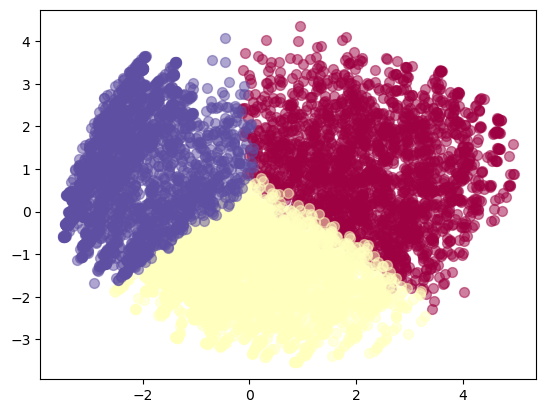

In [115]:
# Run K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)
plot_clusters(X, clusters_kmeans, 'K-means Clustering')
print('K-means')
evaluate_clusters(X, clusters_kmeans)
print('----------------------------------------------')

In [106]:
def plot_clusters(X, clusters, title):
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)

    unique_clusters = np.unique(clusters)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_clusters))]

    for k, col in zip(unique_clusters, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (clusters == k)

        xy = X_pca[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], alpha=0.5)

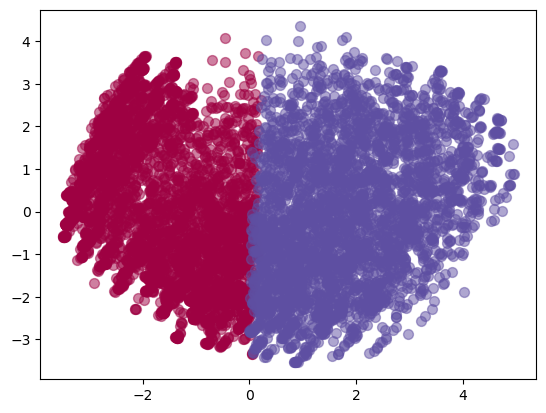

In [107]:
plot_clusters(X, clusters_kmeans, 'K-means Clustering')


MiniBatch K-means
Silhouette Score: 0.14828064849041458
Calinski-Harabasz: 1254.6264255185285
Davies-Bouldin: 2.130917921859338
----------------------------------------------


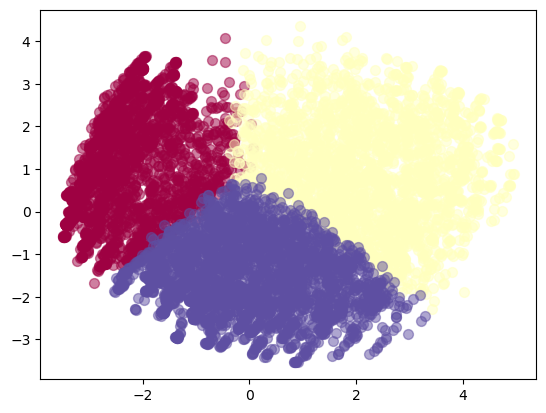

In [117]:
# Run MiniBatch K-means
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
clusters_minibatch_kmeans = minibatch_kmeans.fit_predict(X)
plot_clusters(X, clusters_minibatch_kmeans, 'MiniBatch K-means Clustering')
print('MiniBatch K-means')
evaluate_clusters(X, clusters_minibatch_kmeans)
print('----------------------------------------------')





Gaussian Mixture Model
Silhouette Score: 0.12453747470142777
Calinski-Harabasz: 998.8899603296531
Davies-Bouldin: 2.530993531133974
----------------------------------------------


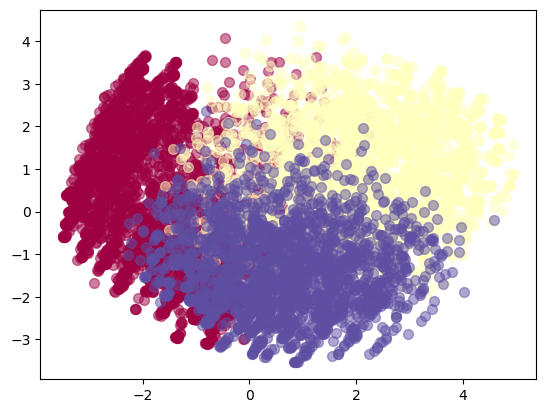

In [118]:

# Run Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X)
plot_clusters(X, clusters_gmm, 'Gaussian Mixture Model Clustering')
print('Gaussian Mixture Model')
evaluate_clusters(X, clusters_gmm)
print('----------------------------------------------')

DBSCAN
Silhouette Score: -0.17926471256172252
Calinski-Harabasz: 43.60349719990029
Davies-Bouldin: 1.2929280868012354
----------------------------------------------


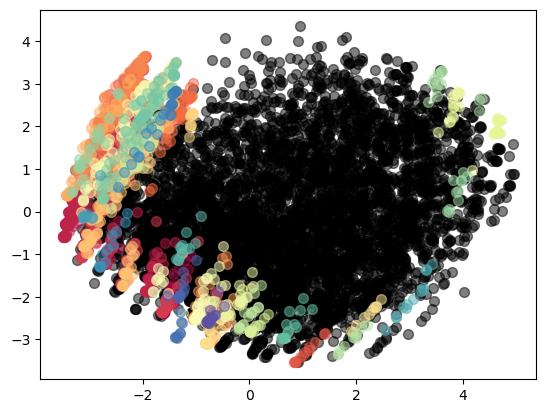

In [119]:
# Run DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X)
plot_clusters(X, clusters_dbscan, 'DBSCAN Clustering')
print('DBSCAN')
evaluate_clusters(X, clusters_dbscan)
print('----------------------------------------------')



Fuzzy C-Means
Silhouette Score: 0.115459592056127
Calinski-Harabasz: 760.0847338472879
Davies-Bouldin: 2.3228681718426456
----------------------------------------------


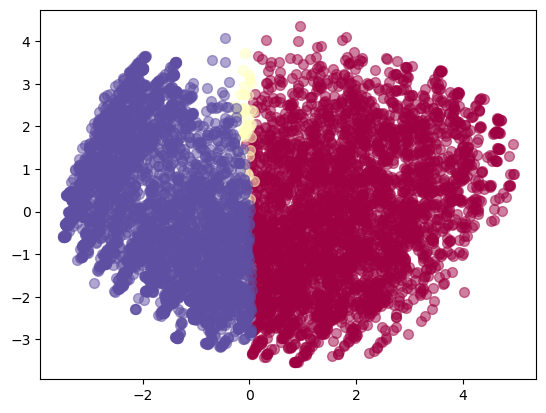

In [123]:
# Run Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, 2, error=0.005, maxiter=1000, init=None)
clusters_fuzzy = np.argmax(u, axis=0)
plot_clusters(X, clusters_fuzzy, 'Fuzzy C-Means Clustering')
print('Fuzzy C-Means')
evaluate_clusters(X, np.asarray(clusters_fuzzy))
print('----------------------------------------------')


Spectral Clustering
Silhouette Score: 0.10157074445417523
Calinski-Harabasz: 291.27677998077587
Davies-Bouldin: 2.0606948093989477
----------------------------------------------


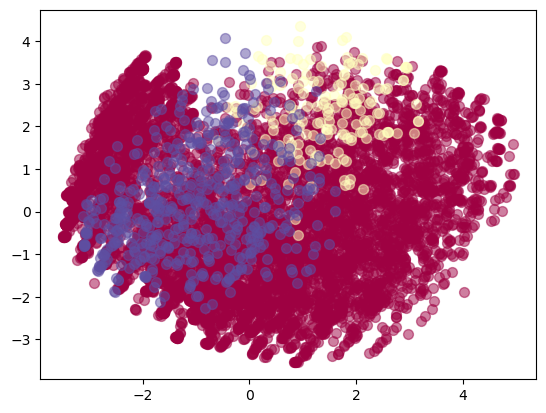

In [130]:

# Run Spectral Clustering
spectral = SpectralClustering(n_clusters=3, random_state=42)
clusters_spectral = spectral.fit_predict(X)
plot_clusters(X, clusters_spectral, 'Spectral Clustering')
print('Spectral Clustering')
evaluate_clusters(X, clusters_spectral)
print('----------------------------------------------')